In [59]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
faces_data = fetch_lfw_people(min_faces_per_person=100)

In [23]:
print(faces_data.target_names)
print(faces_data.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


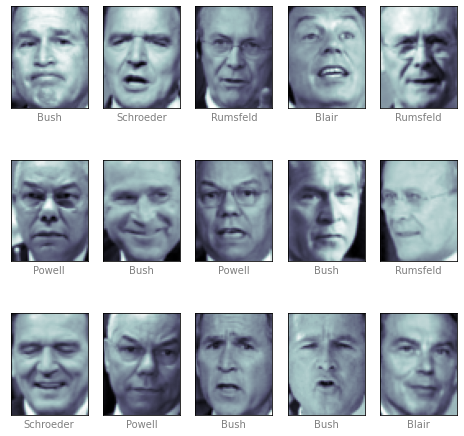

In [24]:
from turtle import color


fig, ax = plt.subplots(3, 5, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces_data.target_names[faces_data.target[i]].split()[-1],color='gray')
plt.show()

In [26]:
#reduce the components
pca = PCA(svd_solver='randomized', n_components=150, whiten=True)

In [27]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [29]:
model = make_pipeline(pca, svc)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(faces_data.data, faces_data.target, test_size=0.25, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(855, 2914) (855,)
(285, 2914) (285,)


In [33]:
#find the parameters of the best model
params = {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001,0.001,0.005]}

In [35]:
grid = GridSearchCV(model, params)

In [38]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.0001, 0.001, 0.005]})

In [39]:
#Beat parameters for RBF kernel
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [40]:
#Best parameters for best model
print(grid.best_estimator_)

Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [43]:
#Create model with best parameters
model = grid.best_estimator_

In [44]:
#predict the test data
y_pred = model.predict(x_test)

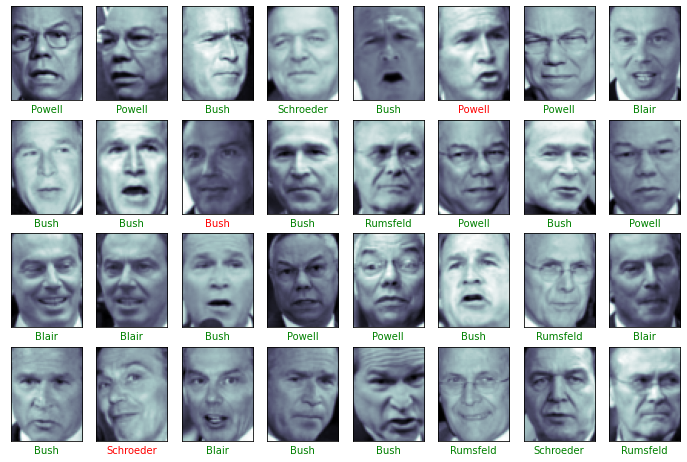

In [53]:
fig, ax = plt.subplots(4, 8, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces_data.target_names[y_pred[i]].split()[-1], color='green' if (y_pred[i] == y_test[i]) else 'red')
plt.show()

In [55]:
#accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print("accuracy %.3f" %accuracy, "%")

accuracy 90.877 %


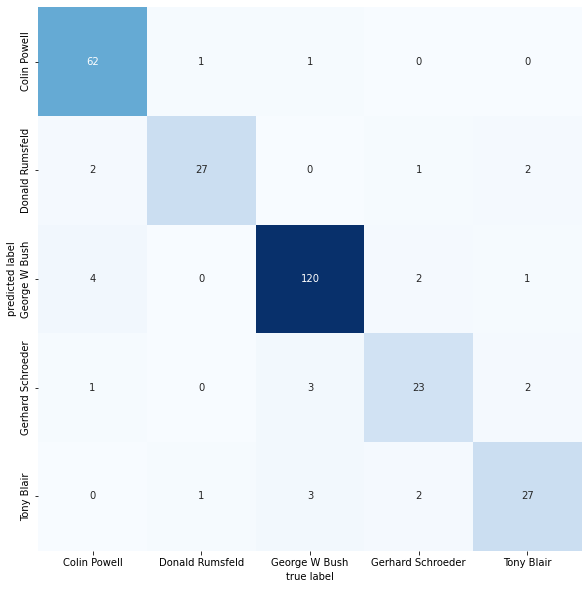

In [70]:
#confusion matrix
from matplotlib.pyplot import figure


cmt = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cmt, annot=True, square=True, cbar=False, 
    xticklabels=faces_data.target_names, 
    yticklabels=faces_data.target_names,
    cmap='Blues',
    fmt='d',
    figure=figure(figsize=(10, 10))
)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()